In [47]:
%load_ext autoreload
%autoreload 2
import numpy as np
import skimage.io as sk
from Functions import image_processing as ip
from Functions import seeded_region_growing as srg
from Functions import unseeded_region_growing as urg
from Functions import seed_detection as sd
from Functions import region_merging as rm
from Functions import dice_score as ds
from Functions import segmentation as seg
from PIL import Image



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


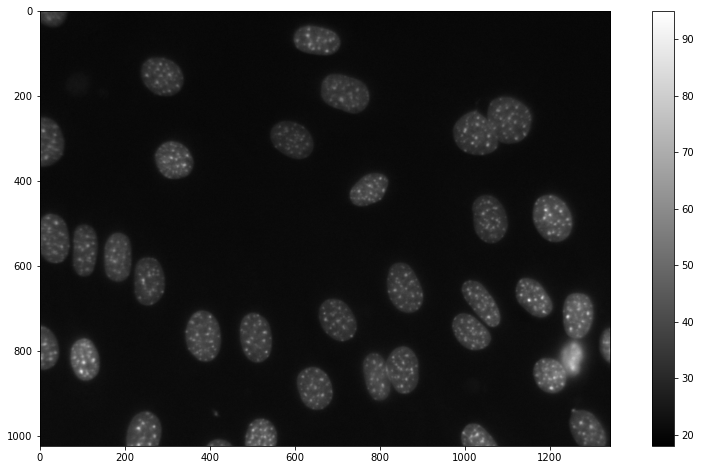

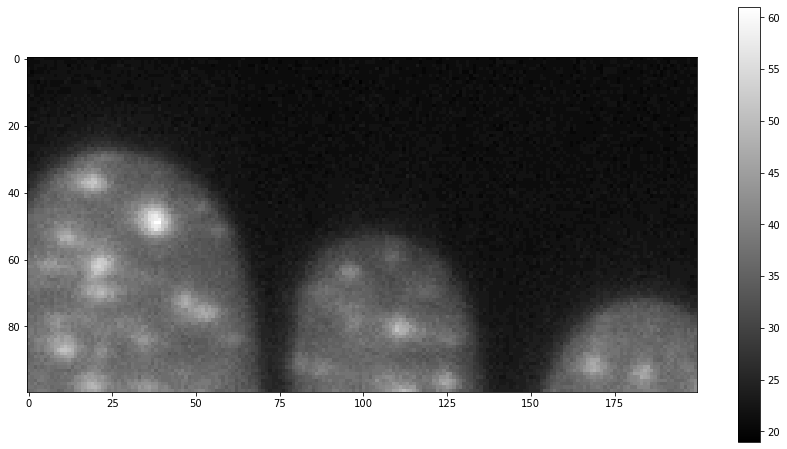

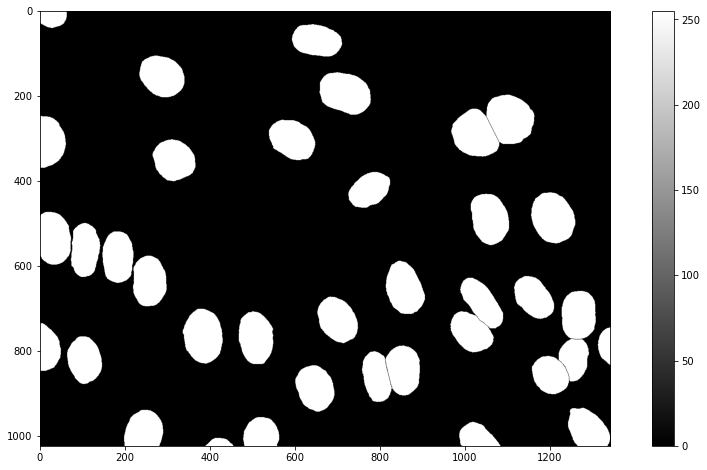

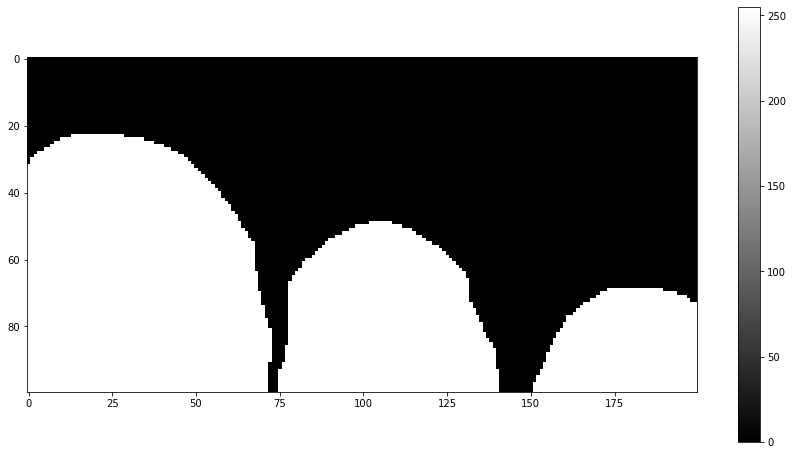

In [28]:
image = sk.imread("../Data/NIH3T3/img/dna-0.png")
ip.show_image(image, 15, 8)
image_small = image[450:550, 0:200]
ip.show_image(image_small, 15, 8)

ground_truth = sk.imread("../Data/NIH3T3/gt/0.png")
ip.show_image(ground_truth, 15, 8)
ground_truth_small = ground_truth[450:550, 0:200]
ip.show_image(ground_truth_small, 15, 8)

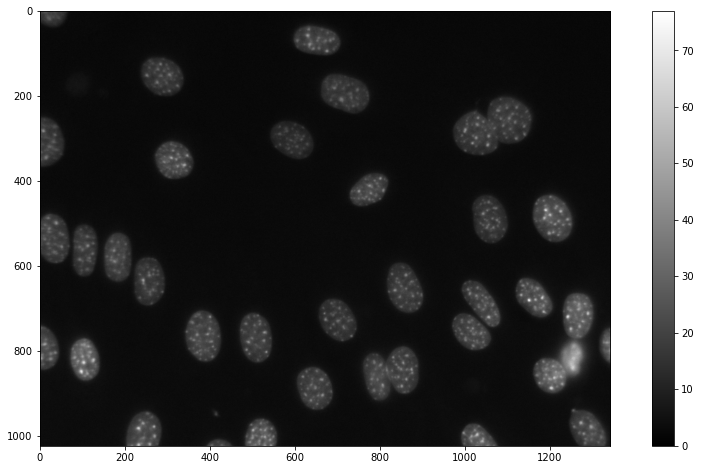

In [29]:
image_subtracted = ip.subtract_minimum(image)
ip.show_image(image_subtracted, 15, 8)

5000
10000
15000


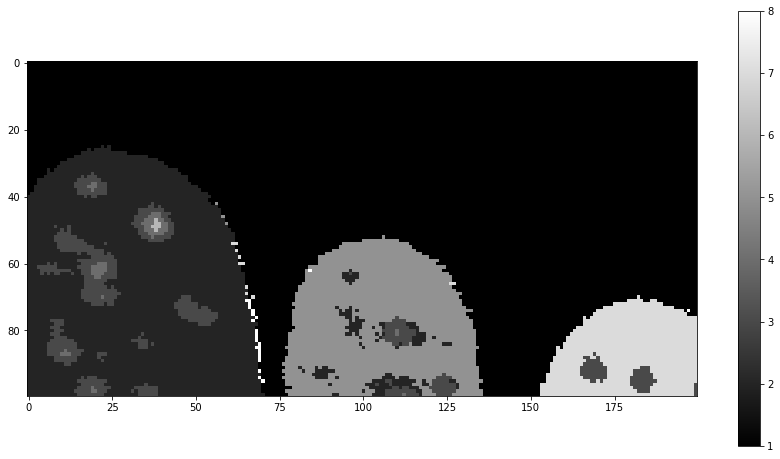

In [30]:
image_urg = urg.unseeded_region_growing_algorithm(image_small, (0, 0), 5)
ip.show_image(image_urg, 15, 8)

8
2
0.9506344712314445


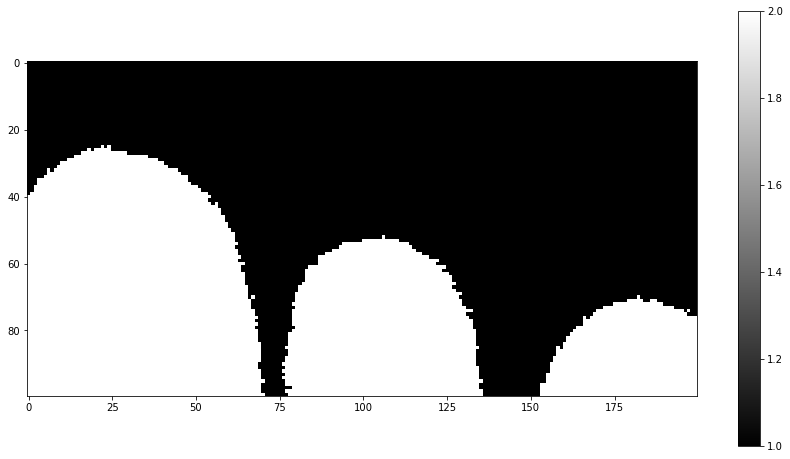

In [37]:
test3 = rm.region_merging(image_urg.copy(), image, 0.01, 100)
ip.show_image(test3, 15, 8)

score_merging = ds.evaluate_accuracy_weighted(test3, ground_truth_small)
print(score_merging)

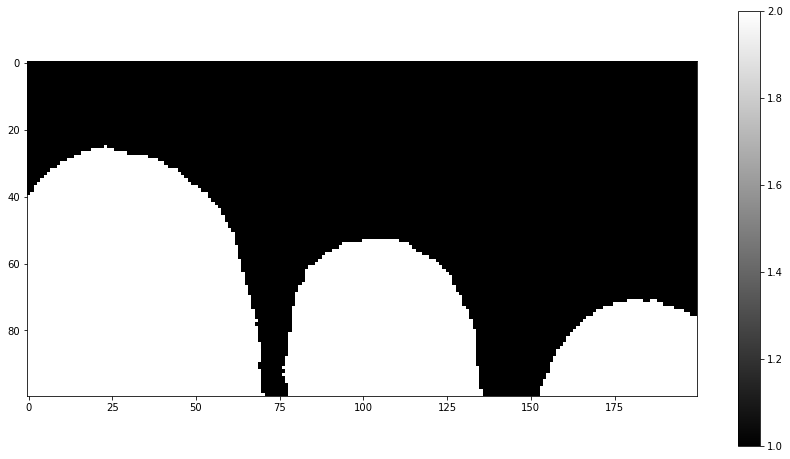

In [40]:
test4 = ip.median_filter(test3, 3)
ip.show_image(test4, 15, 8)

0.9503688802055903
0.95185


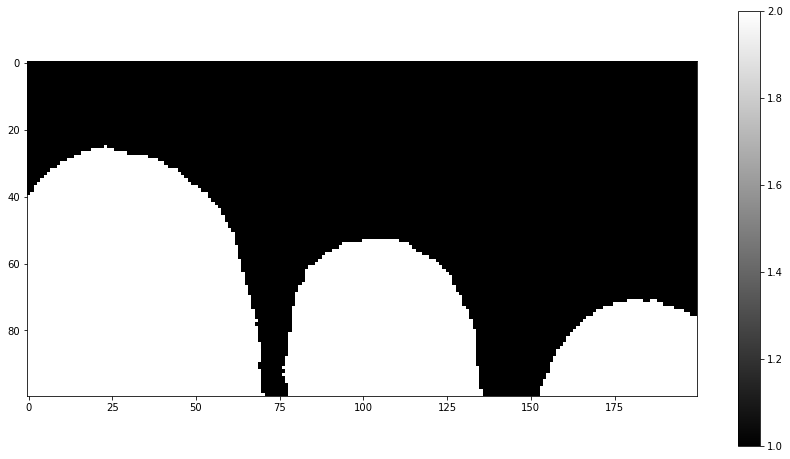

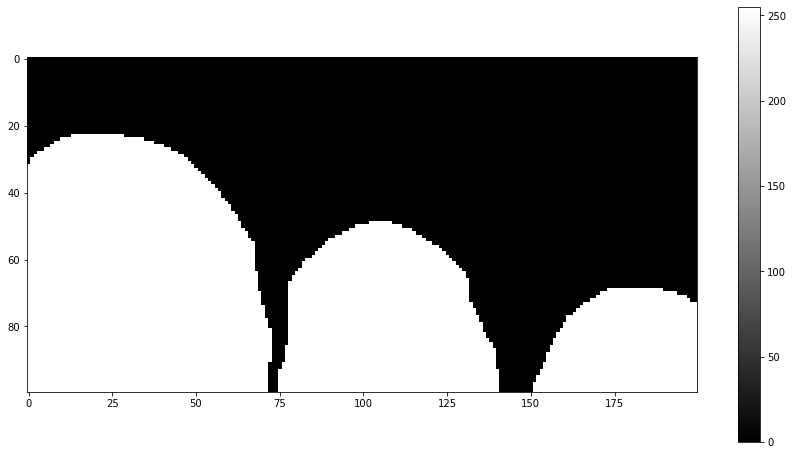

In [41]:
score = ds.evaluate_accuracy_weighted(test4, ground_truth_small)
print(score)
score2 = ds.evaluate_accuracy_unweighted(test4, ground_truth_small)
print(score2)
ip.show_image(test4, 15, 8)
ip.show_image(ground_truth_small, 15, 8)

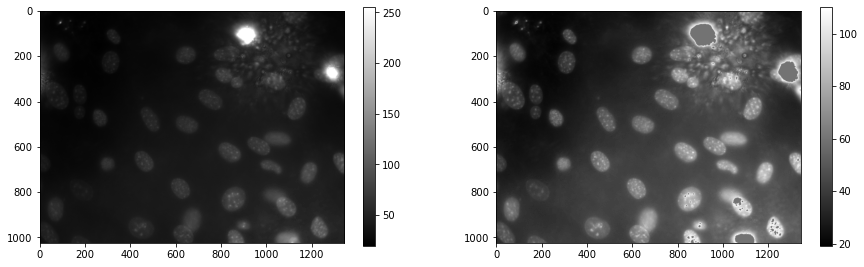

In [58]:
image_intensity_data3 = sk.imread("../Data/NIH3T3/img/dna-42.png")
img_with_bright_spots = sk.imread("../Data/NIH3T3/img/dna-33.png")
img_removed_spots = ip.remove_bright_spots(img_with_bright_spots, 110, 60)
ip.show_two_images_colorbar(img_with_bright_spots, img_removed_spots, 0.55)

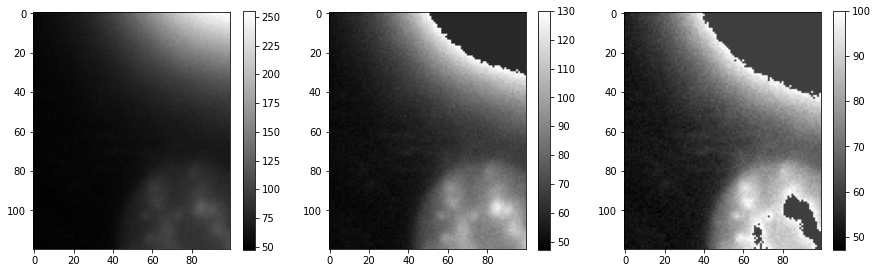

In [69]:
gt_data3_small = sk.imread("../Data/NIH3T3/gt/42.png")[730:850, 1200:1300]
image_intensity_d3_small = image_intensity_data3[730:850, 1200:1300]
img_removed_spots_intact_nuclei = ip.remove_bright_spots(image_intensity_d3_small, 130, 60)
img_removed_spots = ip.remove_bright_spots(image_intensity_d3_small, 100, 60)
ip.show_three_images_colorbar(image_intensity_d3_small, img_removed_spots_intact_nuclei, img_removed_spots, 0.55)


0.5846153846153846


C:\Users\L\PycharmProjects\2021-topic-04-team-04\Functions\seed_detection.py:50: RuntimeWarning: overflow encountered in ubyte_scalars
  neighborhood_distance.append((img[p] - img[i, j]) / (img[p] + 0.000001))


5000
10000
448.0
100
200
300
400
3
unweighted dice score: 0.6139166666666667, weighted dice score: 0.38038932204264986


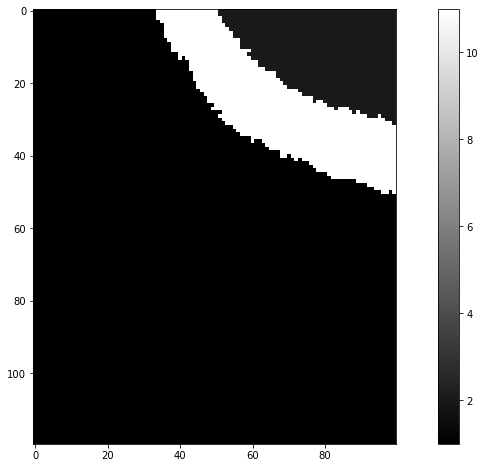

In [66]:
result_seg_removed_spots_intact_nuclei = seg.seeded_segmentation(img_removed_spots_intact_nuclei,gt_data3_small, 0.05, 0.26, 400)
result_seg_removed_spots_intact_nuclei_clipped = ds.final_clipping(result_seg_removed_spots_intact_nuclei)


ip.show_image(result_seg_removed_spots_intact_nuclei, 15, 8)

In [68]:
result_seg_with_bright_spots = seg.seeded_segmentation(image_intensity_d3_small, gt_data3_small, 0.05, 0.1, 400)
result_seg_with_bright_spots_clipped = ds.final_clipping(result_seg_with_bright_spots)

result_seg_removed_spots_intact_nuclei = seg.seeded_segmentation(img_removed_spots_intact_nuclei,gt_data3_small, 0.05, 0.26, 400)
result_seg_removed_spots_intact_nuclei_clipped = ds.final_clipping(result_seg_removed_spots_intact_nuclei)

result_seg_removed_spots_extreme = seg.seeded_segmentation(img_removed_spots, gt_data3_small, 0.05, 0.24, 400)
result_seg_removed_spots_extreme_clipped = ds.final_clipping(result_seg_removed_spots_extreme)

ip.show_three_images_colorbar(result_seg_with_bright_spots_clipped, result_seg_removed_spots_intact_nuclei_clipped, result_seg_removed_spots_extreme_clipped, 0.55)



0.4588235294117647
5000
10000
450.0
100
200
300
400
7
unweighted dice score: 0.7325833333333334, weighted dice score: 0.645677825689666
0.5230769230769231
5000
10000
448.0
100
200
300
400
3
unweighted dice score: 0.6139166666666667, weighted dice score: 0.38038932204264986
0.0
5000
10000
15000
20000


KeyboardInterrupt: 